In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
num_words = 10000
(train_data, train_labels),(test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=num_words)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i,word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension= num_words)
test_data = multi_hot_sequences(test_data, dimension = num_words)

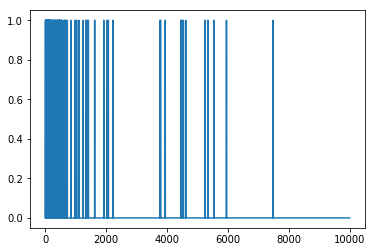

In [4]:
plt.plot(train_data[0])

In [8]:
baseline_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(num_words,)),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data,test_labels),
                                     verbose = 2)

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 11s - loss: 0.5030 - acc: 0.7966 - binary_crossentropy: 0.5030 - val_loss: 0.3429 - val_acc: 0.8734 - val_binary_crossentropy: 0.3429
Epoch 2/20
 - 9s - loss: 0.2546 - acc: 0.9086 - binary_crossentropy: 0.2546 - val_loss: 0.2854 - val_acc: 0.8873 - val_binary_crossentropy: 0.2854
Epoch 3/20
 - 9s - loss: 0.1845 - acc: 0.9346 - binary_crossentropy: 0.1845 - val_loss: 0.2903 - val_acc: 0.8849 - val_binary_crossentropy: 0.2903
Epoch 4/20
 - 9s - loss: 0.1486 - acc: 0.9483 - binary_crossentropy: 0.1486 - val_loss: 0.3202 - val_acc: 0.8754 - val_binary_crossentropy: 0.3202
Epoch 5/20
 - 9s - loss: 0.1203 - acc: 0.9604 - binary_crossentropy: 0.1203 - val_loss: 0.3368 - val_acc: 0.8754 - val_binary_crossentropy: 0.3368
Epoch 6/20
 - 9s - loss: 0.0973 - acc: 0.9700 - binary_crossentropy: 0.0973 - val_loss: 0.3652 - val_acc: 0.8728 - val_binary_crossentropy: 0.3652
Epoch 7/20
 - 10s -

In [10]:
smaller_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(num_words,)),
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 10s - loss: 0.6161 - acc: 0.6551 - binary_crossentropy: 0.6161 - val_loss: 0.5500 - val_acc: 0.8074 - val_binary_crossentropy: 0.5500
Epoch 2/20
 - 9s - loss: 0.4906 - acc: 0.8464 - binary_crossentropy: 0.4906 - val_loss: 0.4807 - val_acc: 0.8545 - val_binary_crossentropy: 0.4807
Epoch 3/20
 - 9s - loss: 0.4226 - acc: 0.8996 - binary_crossentropy: 0.4226 - val_loss: 0.4427 - val_acc: 0.8722 - val_binary_crossentropy: 0.4427
Epoch 4/20
 - 9s - loss: 0.3668 - acc: 0.9250 - binary_crossentropy: 0.3668 - val_loss: 0.4035 - val_acc: 0.8832 - val_binary_crossentropy: 0.4035
Epoch 5/20
 - 9s - loss: 0.2847 - acc: 0.9425 - binary_crossentropy: 0.2847 - val_loss: 0.3188 - val_acc: 0.8835 - val_binary_crossentropy: 0.3188
Epoch 6/20
 - 9s - loss: 0.1847 - acc: 0.9494 - binary_crossentropy: 0.1847 - val_loss: 0.2955 - val_acc: 0.8831 - val_binary_crossentropy: 0.2955
Epoch 7/20
 - 9s - loss: 0.1457 - acc: 0.9577 - binary_crossentropy

In [14]:
bigger_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(num_words,)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [15]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 28s - loss: 0.3387 - acc: 0.8583 - binary_crossentropy: 0.3387 - val_loss: 0.2927 - val_acc: 0.8823 - val_binary_crossentropy: 0.2927
Epoch 2/20
 - 28s - loss: 0.1412 - acc: 0.9492 - binary_crossentropy: 0.1412 - val_loss: 0.3352 - val_acc: 0.8710 - val_binary_crossentropy: 0.3352
Epoch 3/20
 - 27s - loss: 0.0445 - acc: 0.9876 - binary_crossentropy: 0.0445 - val_loss: 0.4668 - val_acc: 0.8675 - val_binary_crossentropy: 0.4668
Epoch 4/20
 - 26s - loss: 0.0070 - acc: 0.9986 - binary_crossentropy: 0.0070 - val_loss: 0.5857 - val_acc: 0.8691 - val_binary_crossentropy: 0.5857
Epoch 5/20
 - 27s - loss: 7.5327e-04 - acc: 1.0000 - binary_crossentropy: 7.5327e-04 - val_loss: 0.6841 - val_acc: 0.8698 - val_binary_crossentropy: 0.6841
Epoch 6/20
 - 32s - loss: 2.0458e-04 - acc: 1.0000 - binary_crossentropy: 2.0458e-04 - val_loss: 0.7212 - val_acc: 0.8704 - val_binary_crossentropy: 0.7212
Epoch 7/20
 - 31s - loss: 1.2728e-04 - acc: 1.

a lower validation loss indicates a better model

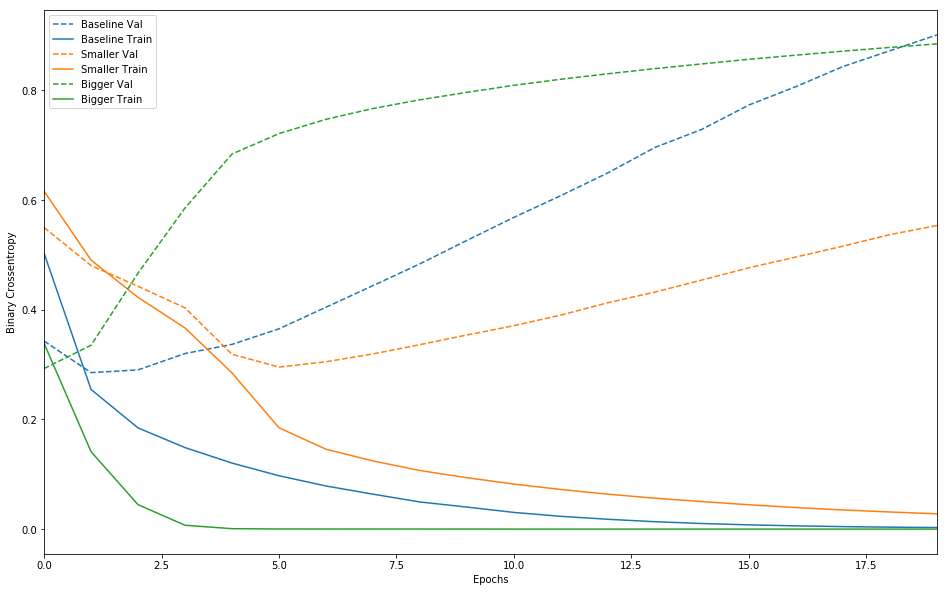

In [16]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [17]:
l2_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, kernel_regularizer = tf.keras.regularizers.l2(0.001),
                         activation = tf.nn.relu, input_shape=(num_words,)),
    tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                         activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 11s - loss: 0.5081 - acc: 0.8161 - binary_crossentropy: 0.4655 - val_loss: 0.3672 - val_acc: 0.8789 - val_binary_crossentropy: 0.3225
Epoch 2/20
 - 8s - loss: 0.2952 - acc: 0.9086 - binary_crossentropy: 0.2463 - val_loss: 0.3352 - val_acc: 0.8870 - val_binary_crossentropy: 0.2833
Epoch 3/20
 - 9s - loss: 0.2465 - acc: 0.9319 - binary_crossentropy: 0.1920 - val_loss: 0.3424 - val_acc: 0.8842 - val_binary_crossentropy: 0.2862
Epoch 4/20
 - 8s - loss: 0.2261 - acc: 0.9416 - binary_crossentropy: 0.1680 - val_loss: 0.3628 - val_acc: 0.8774 - val_binary_crossentropy: 0.3034
Epoch 5/20
 - 9s - loss: 0.2100 - acc: 0.9497 - binary_crossentropy: 0.1493 - val_loss: 0.3731 - val_acc: 0.8773 - val_binary_crossentropy: 0.3114
Epoch 6/20
 - 9s - loss: 0.1975 - acc: 0.9555 - binary_crossentropy: 0.1347 - val_loss: 0.3869 - val_acc: 0.8742 - val_binary_crossentropy: 0.3233
Epoch 7/20
 - 8s - loss: 0.1889 - acc: 0.9594 - binary_crossentropy

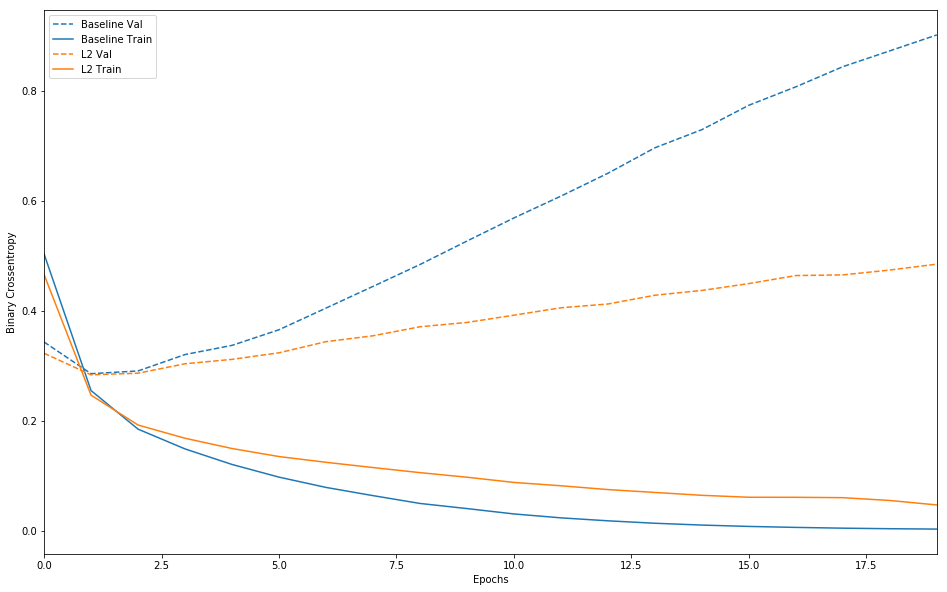

In [18]:
plot_history([('baseline', baseline_history),
             ('l2', l2_model_history)])

In [19]:
dpt_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape = (num_words,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 10s - loss: 0.6538 - acc: 0.5989 - binary_crossentropy: 0.6538 - val_loss: 0.5381 - val_acc: 0.8458 - val_binary_crossentropy: 0.5381
Epoch 2/20
 - 9s - loss: 0.4941 - acc: 0.7720 - binary_crossentropy: 0.4941 - val_loss: 0.3588 - val_acc: 0.8780 - val_binary_crossentropy: 0.3588
Epoch 3/20
 - 9s - loss: 0.3734 - acc: 0.8513 - binary_crossentropy: 0.3734 - val_loss: 0.2923 - val_acc: 0.8875 - val_binary_crossentropy: 0.2923
Epoch 4/20
 - 9s - loss: 0.2999 - acc: 0.8912 - binary_crossentropy: 0.2999 - val_loss: 0.2749 - val_acc: 0.8887 - val_binary_crossentropy: 0.2749
Epoch 5/20
 - 9s - loss: 0.2534 - acc: 0.9114 - binary_crossentropy: 0.2534 - val_loss: 0.2745 - val_acc: 0.8894 - val_binary_crossentropy: 0.2745
Epoch 6/20
 - 8s - loss: 0.2155 - acc: 0.9258 - binary_crossentropy: 0.2155 - val_loss: 0.2853 - va

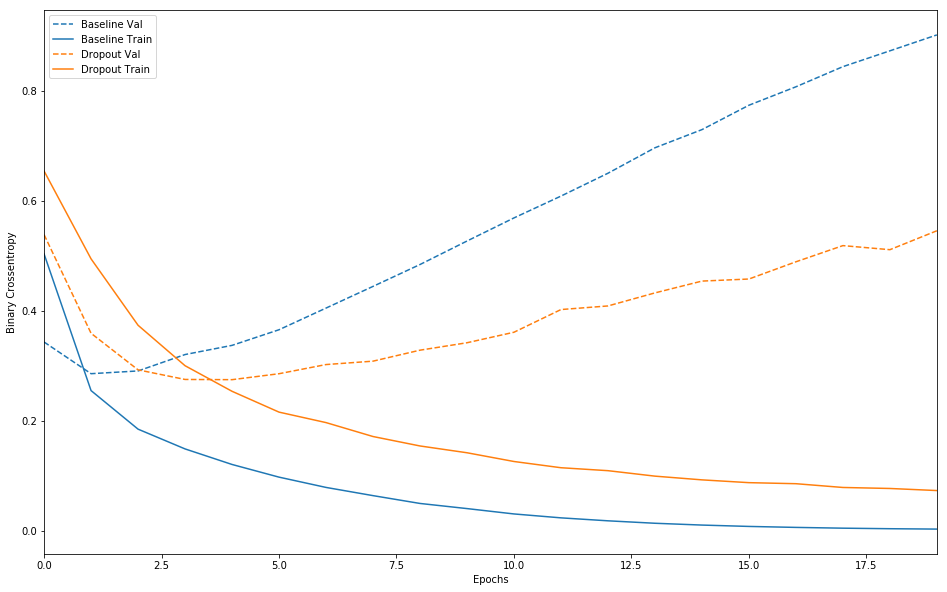

In [20]:
plot_history([('baseline', baseline_history),
             ('dropout', dpt_model_history)])

the most common ways to prevent overfitting in nn are:

* Get more training data
* Reduce the capacity of the network
* Add weight regularization
* Add dropout